<a href="https://colab.research.google.com/github/santhoshbvsrk/DeepLearning/blob/main/DigitRecognizer_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
#installing tensorflow-gpu for running our notebook on GPU (NOTE: Need to enable RunTime as GPU before executing this notebook)
!pip install tensorflow-gpu

### Import all necessary Packages

In [72]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split #importing train_test_split from sklearn for spliting data for training & testing

import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from keras import datasets       #import datasets provided by Keras API 
from keras import models         #importing models package from Keras
from keras import Sequential     #importing Sequential package from Keras to create a Sequential model
from keras import layers         #importing layers module from Keras API which will be used for adding Input Layers, Hidden Layers & Output Layers
from keras.layers import Dense   #importing Dense function from layers module of Keras API
from keras.layers.core import Dropout #importing DropOut function from Keras API
from keras.models import load_model #importing load_model function from Keras API
from keras.callbacks import EarlyStopping  #importing EarlyStopping function from Callbacks module of Keras API
from keras.callbacks import ModelCheckpoint   #importing ModelCheckPoint function from Callbacks module of Keras API
from keras import regularizers  #importing regularizer for adding L1 & L2 regularizers on the models

### Load Data into Train & Test variables

In [73]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

### Split Test Data for Validation & Test

In [74]:
np.random.seed=1000
tf.random.set_seed=42

X_validation,X_test,y_validation,y_test = train_test_split(X_test,y_test, train_size=0.5)

print(X_train.shape)
print(y_train.shape)
print(X_validation.shape)
print(y_validation.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(5000, 28, 28)
(5000,)
(5000, 28, 28)
(5000,)


### Function to plot images from the dataset

In [75]:
def plot_sample(X,y,index):
  plt.figure(figsize = (2,2))
  plt.imshow(X[index],cmap=plt.cm.binary)
  plt.xlabel(y[index])
  plt.show()

### Calling Function to plot sample images from dataset

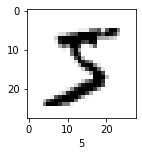

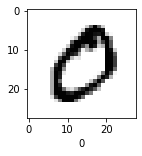

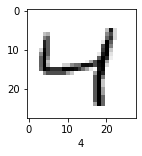

In [76]:
for index in range(0,3):
  plot_sample(X_train,y_train,index)

### ANN with 3 Hidden Layers

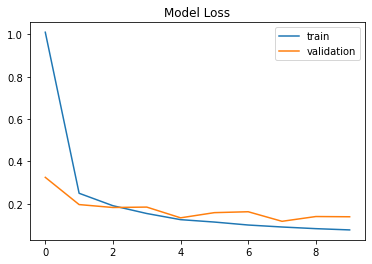

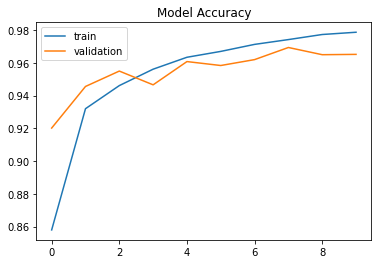

In [77]:
#Create Model
model_hl = Sequential() #Initiailizing Sequential module
model_hl.add(layers.Flatten(input_shape=(28,28))) #Flattening input and providing input dimensions
model_hl.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_hl.add(Dense(80,activation='relu'))
model_hl.add(Dense(60,activation='relu'))
model_hl.add(Dense(10,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_hl.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#Displaying Model Summary
#model_hl.summary()  #to display module summary 

#fit the model 
history_hl = model_hl.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_hl.history['loss'],label='train')
plt.plot(history_hl.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_hl.history['acc'],label='train')
plt.plot(history_hl.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_hl.history
dr_df_dict['Model']='Model With Hidden Layers'
dr_df_dict['To_Predict']='model_hl'
history_hl_df = pd.DataFrame.from_dict(dr_df_dict)
final_df = history_hl_df[-1:]
final_df.reset_index(drop=True,inplace=True)

### ANN with 3 Hidden Layers & L1 Regularizer

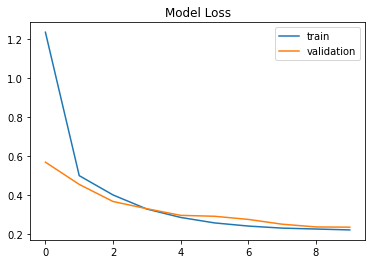

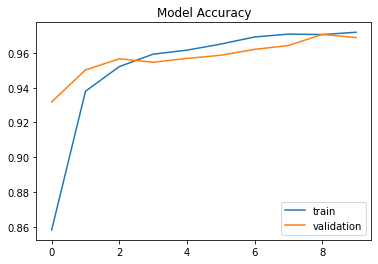

In [78]:
#Create Model
model_l1 = Sequential() #Initiailizing Sequential module
model_l1.add(layers.Flatten(input_shape=(28,28))) #Flattening input and providing input dimensions
model_l1.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l1(0.0001))) #Adding HiddenLayer and activation function
model_l1.add(Dense(80,activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dense(60,activation='relu',kernel_regularizer=regularizers.l1(0.0001)))
model_l1.add(Dense(10,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_l1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_l1 = model_l1.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_l1.history['loss'],label='train')
plt.plot(history_l1.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_l1.history['acc'],label='train')
plt.plot(history_l1.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_l1.history
dr_df_dict['Model']='Model With HL & L1 Regularizer'
dr_df_dict['To_Predict']='model_l1'
history_l1_df = pd.DataFrame.from_dict(dr_df_dict)
final_df=final_df.append(history_l1_df[-1:])
final_df.reset_index(drop=True,inplace=True)

### ANN with 3 Hidden Layers & L2 Regularizer

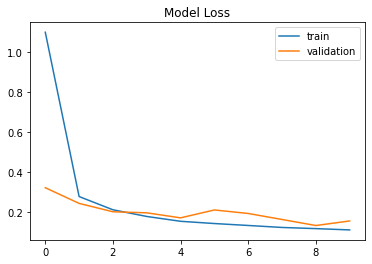

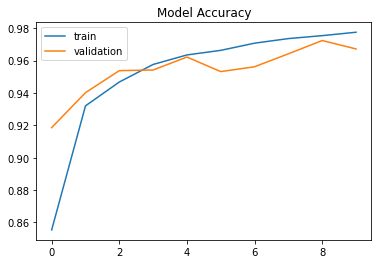

In [79]:
#Create Model
model_l2 = Sequential() #Initiailizing Sequential module
model_l2.add(layers.Flatten(input_shape=(28,28))) #Flattening input and providing input dimensions
model_l2.add(Dense(100,activation='relu',kernel_regularizer=regularizers.l2(0.0001))) #Adding HiddenLayer and activation function
model_l2.add(Dense(80,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(60,activation='relu',kernel_regularizer=regularizers.l2(0.0001)))
model_l2.add(Dense(10,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_l2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#fit the model 
history_l2 = model_l2.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),verbose=0)

#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_l2.history['loss'],label='train')
plt.plot(history_l2.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test accuracy
plt.title('Model Accuracy')
plt.plot(history_l2.history['acc'],label='train')
plt.plot(history_l2.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_l2.history
dr_df_dict['Model']='Model With HL & L2 Regularizer'
dr_df_dict['To_Predict']='model_l2'
history_l2_df = pd.DataFrame.from_dict(dr_df_dict)
final_df=final_df.append(history_l2_df[-1:])
final_df.reset_index(drop=True,inplace=True)

### ANN with 3 Hidden Layers & EarlyStopping Callback

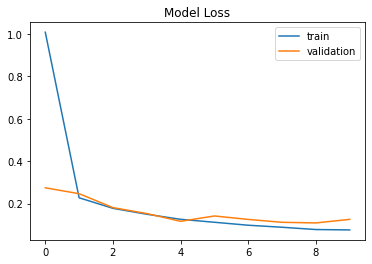

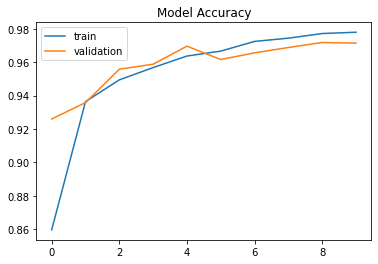

In [80]:
#Create Model
model_es = Sequential() #Initiailizing Sequential module
model_es.add(layers.Flatten(input_shape=(28,28))) #Flattening input and providing input dimensions
model_es.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_es.add(Dense(80,activation='relu'))
model_es.add(Dense(60,activation='relu'))
model_es.add(Dense(10,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_es.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric 

#Defining parameters for EarlyStopping & ModelCheckPoint callback functions
es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0) #Defining parameter for Early Stopping call back

#fit the model 
history_es = model_es.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es],verbose=0)

print('\n')
#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_es.history['loss'],label='train')
plt.plot(history_es.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_es.history['acc'],label='train')
plt.plot(history_es.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es.history
dr_df_dict['Model']='Model with EarlyStopping Callback'
dr_df_dict['To_Predict']='model_es'
history_es = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es[-1:])
final_df.reset_index(drop=True,inplace=True)

### ANN with 3 Hidden Layers using EarlyStopping and CheckPoint callbacks

Train: 0.981367, Validation: 0.972200
Train Loss: 0.060884, Validation Loss: 0.097379




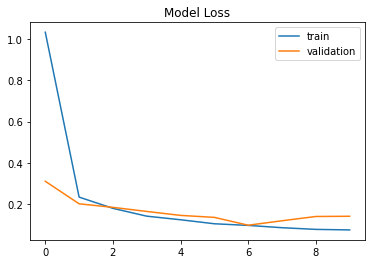

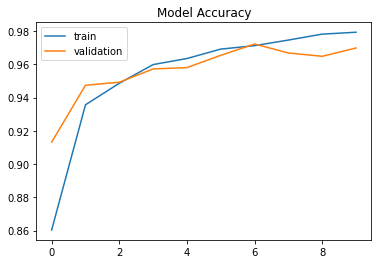

In [81]:
#Create Model
model_es_cp = Sequential() #Initiailizing Sequential module
model_es_cp.add(layers.Flatten(input_shape=(28,28))) #Flattening input and providing input dimensions
model_es_cp.add(Dense(100,activation='relu')) #Adding HiddenLayer and activation function
model_es_cp.add(Dense(80,activation='relu'))
model_es_cp.add(Dense(60,activation='relu'))
model_es_cp.add(Dense(10,activation='softmax')) #Adding Output layer and activation function

#Compile model
model_es_cp.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc']) #compiling model with Optimizer, loss and metric

#Defining parameters for EarlyStopping & ModelCheckPoint callback functions
es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0) #Defining parameter for Early Stopping call back
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=0,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

#fit the model 
history_es_cp = model_es_cp.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp],verbose=0)
#save the best model
saved_model = load_model('best_model.h5')

#calculating Training & Validation Accuracy & Loss on the best model saved
train_loss, train_acc = saved_model.evaluate(X_train,y_train,verbose=0)
validation_loss, validation_acc = saved_model.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('Train Loss: %3f, Validation Loss: %3f' % (train_loss,validation_loss))

print('\n')
#plot to see training & test loss
plt.title('Model Loss')
plt.plot(history_es_cp.history['loss'],label='train')
plt.plot(history_es_cp.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & test loss
plt.title('Model Accuracy')
plt.plot(history_es_cp.history['acc'],label='train')
plt.plot(history_es_cp.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es_cp.history
dr_df_dict['Model']='Model with Early Stopping & Checkpoint Callbacks'
dr_df_dict['To_Predict']='model_es_cp'
history_es_cp_df = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es_cp_df[-1:])
final_df.reset_index(drop=True,inplace=True)

tmp_df = {'loss':train_loss,'acc':train_acc,'val_loss':validation_loss,'val_acc':validation_acc,'Model':'Best Model with Early Stopping & Checkpoint Callbacks','To_Predict':'saved_model'}
final_df = final_df.append(tmp_df,ignore_index=True)

### ANN with 3 Hidden Layers, EarlyStopping & Checkpoint callbacks along with a Dropout @25% on every Hidden Layer

Train: 0.980950, Validation: 0.970600
Train Loss: 0.063981, Validation Loss: 0.117695




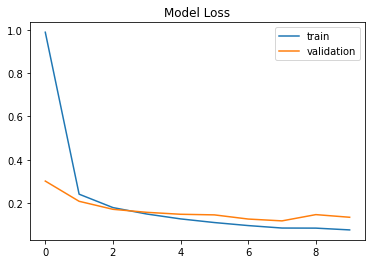

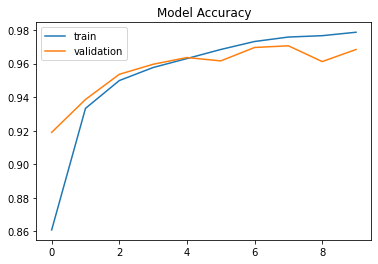

In [87]:
model_es_cp_do = Sequential()

model_es_cp_do.add(layers.Flatten(input_shape=(28,28)))
model_es_cp_do.add(Dense(100,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(80,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(60,activation='relu')), Dropout(0.25)
model_es_cp_do.add(Dense(10,activation='softmax')), Dropout(0.25)

model_es_cp_do.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

es = EarlyStopping(monitor='val_loss',patience=200,mode='min',verbose=0)
cp = ModelCheckpoint('best_model.h5',monitor='val_acc',mode='max',verbose=0,save_best_only=True) #the best model will be stored in best_model.h5 file which will be created in the instance which we are saving

history_es_cp_do = model_es_cp_do.fit(x=X_train,y=y_train,epochs=10,validation_data=(X_validation,y_validation),callbacks=[es,cp],verbose=0)
#Monitor='val_loss' is to tell the model to monitor val_loss value, with a patience of 3 i.e., after finding a min value on val_loss see 3 more epochs if at all the val_loss is further decreasing if not stop the model.

saved_model_do = load_model('best_model.h5')

#calculating Training & Validation Accuracy & Loss on the best model saved
train_loss, train_acc = saved_model_do.evaluate(X_train,y_train,verbose=0)
validation_loss, validation_acc = saved_model_do.evaluate(X_validation,y_validation,verbose=0)

print('Train: %3f, Validation: %3f' % (train_acc,validation_acc))
print('Train Loss: %3f, Validation Loss: %3f' % (train_loss,validation_loss))

print('\n')
#plot to see training & validation loss
plt.title('Model Loss')
plt.plot(history_es_cp_do.history['loss'],label='train')
plt.plot(history_es_cp_do.history['val_loss'],label='validation')
plt.legend()
plt.show()
print('\n')
#plot to see training & validation accuracy
plt.title('Model Accuracy')
plt.plot(history_es_cp_do.history['acc'],label='train')
plt.plot(history_es_cp_do.history['val_acc'],label='validation')
plt.legend()
plt.show()

dr_df_dict = history_es_cp_do.history
dr_df_dict['Model']='Model With Dropout & EarlyStopping, CheckPoint Callbacks'
dr_df_dict['To_Predict']='model_es_cp_do'
history_es_cp_do = pd.DataFrame.from_dict(dr_df_dict)
final_df = final_df.append(history_es_cp_do[-1:])
final_df.reset_index(drop=True,inplace=True)

tmp_df = {'loss':train_loss,'acc':train_acc,'val_loss':validation_loss,'val_acc':validation_acc,'Model':'Best Model with Dropout & Early Stopping, Checkpoint Callbacks','To_Predict':'saved_model_do'}
final_df = final_df.append(tmp_df,ignore_index=True)

### Dataframe which stores Training & Validation Loss & Accuracy for all the models including the best models saved via Checkpoint Callback to choose from for Prediction

In [83]:
final_df

,loss,acc,val_loss,val_acc,Model,To_Predict
0,0.075937,0.978717,0.138089,0.9652,Model With Hidden Layers,model_hl
1,0.221310,0.971833,0.235378,0.9688,Model With HL & L1 Regularizer,model_l1
2,0.109868,0.977517,0.154764,0.9672,Model With HL & L2 Regularizer,model_l2
3,0.076155,0.977933,0.125871,0.9714,Model with EarlyStopping Callback,model_es
4,0.074594,0.979267,0.140806,0.9698,Model with Early Stopping & Checkpoint Callbacks,model_es_cp
5,0.060884,0.981367,0.097379,0.9722,Best Model with Early Stopping & Checkpoint Ca...,saved_model
6,0.068355,0.980733,0.140300,0.9708,"Model With Dropout & EarlyStopping, CheckPoint...",model_es_cp_do
7,0.058924,0.982767,0.122980,0.9718,"Best Model with Dropout & Early Stopping, Chec...",saved_model_do


* Based on the above data we are choosing model with Hidden Layers & EarlyStopping & Checkpoint Callbacks and the model is saved in saved_model which should be used for prediction.

### Test Data Prediction based on choosen Model

In [84]:
predictions = saved_model.predict(X_test) #predicting value using the Early Stopping model.

In [85]:
predictions[0] # this gives the one hot encoding value of the target variable for the provided index.
print("Predicted Value for image @{} position in Test Data is: {}".format(0,np.argmax(predictions[0]))) #this gives the value of prediction.
print("Actual value for image @{} position in Test Data is: {}".format(0,y_test[0])) #this gives the actual value

Predicted Value for image @0 position in Test Data is: 4
Actual value for image @0 position in Test Data is: 7


### Evaluating Test Data Accuracy & Loss

In [86]:
test_loss, test_acc = saved_model.evaluate(X_test,y_test,verbose=0)
print('Test Accuracy is: %3f & Test Loss is: %3f' % (test_acc,test_loss))

Test Accuracy is: 0.968400 & Test Loss is: 0.120163


# Conclusion

* This shows that the overall Test accuracy is ~97% with Loss at ~9%.